# Guided and Leaky modes of multi-layered slab anti-guide

More complex 4 layer structure.

In [3]:
import numpy as np
import matplotlib as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.optimize import newton
import matplotlib.pyplot as plt

In [11]:
A = SlabExact(scale=1e-6, ts=[4e-6, 2e-6, 2e-6, 4e-6],
              ns=[1.5, 1.47, 1.45, 1.5], xrefs=[400, 200, 200, 400],
              symmetric=True)

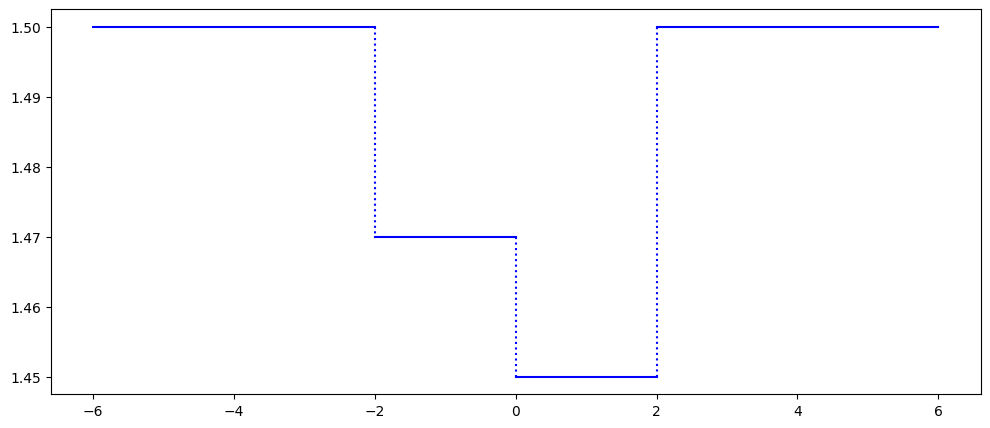

In [5]:
A.plot_refractive_index()

# Leaky Modes

In [6]:
field_type = 'TE'
mode_type = 'leaky'

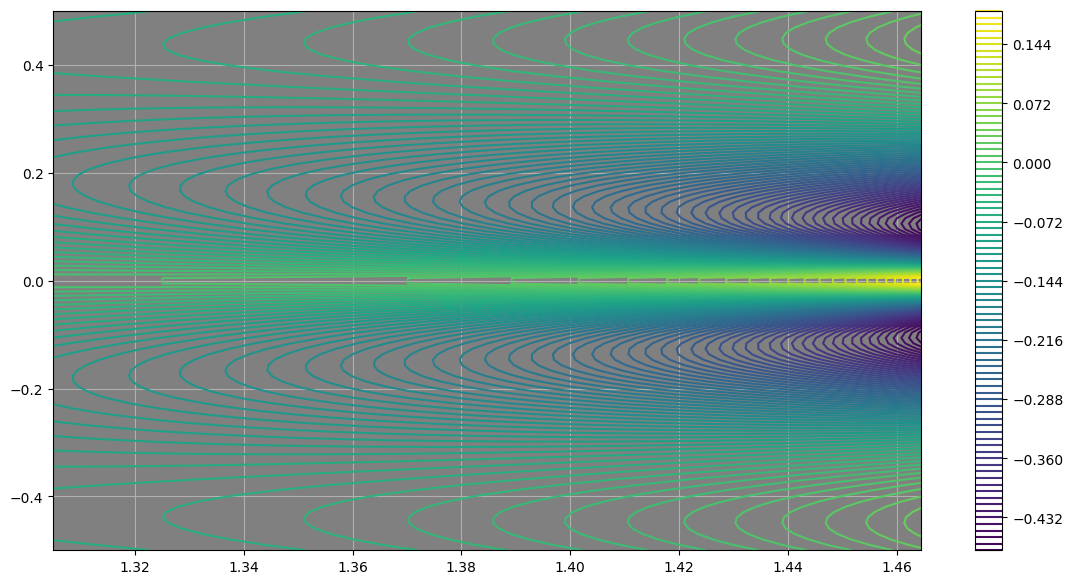

In [7]:
plotlogf(A.determinant, .9* A.K_low, 1.01*A.K_low, -.5, .5, field_type, mode_type,
         iref=100, rref=100,levels=100)

In [12]:
beta_l1 = newton(A.determinant, np.array([5.06+.1j]), args=(field_type, mode_type))[0]
beta_l2 = newton(A.determinant, np.array([4.9+.2j]), args=(field_type, mode_type))[0]
# beta4 = newton(A.determinant, 10.42, args=(field_type, mode_type)).conj()
# beta5 = newton(A.determinant, 10.2, args=(field_type, mode_type)).conj()

beta_l1, beta_l2

((5.063420345724683+0.04393130395480896j),
 (4.918766899193484+0.15004340346845282j))

In [13]:
Fl1 = A.fields(beta_l1, field_type=field_type, mode_type=mode_type, c0=1)
Fl2 = A.fields(beta_l2, field_type=field_type, mode_type=mode_type, c0=-1)
# Fs3 = A.fields(beta3, field_type=field_type, mode_type=mode_type, c0=-1)
# Fs4 = A.fields(beta4, field_type=field_type, mode_type=mode_type, c0=-1)
# # Fs5 = A.fields(beta5, field_type=field_type, mode_type=mode_type, c0=-1)

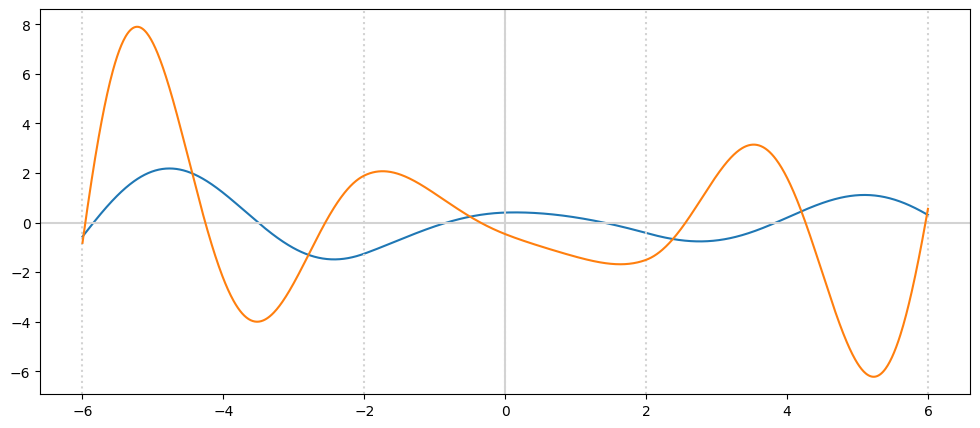

In [34]:
A.plot_field_1d(Fl1)
A.add_1d_plot(plt.gca(), Fl2)
# A.add_1d_plot(plt.gca(), Fs3)
# A.add_1d_plot(plt.gca(), Fs4)
# A.add_1d_plot(plt.gca(), Fs5)


## Radiation Modes

In [8]:
 A.Z_hyperbolic, A.Z_evanescent.real

(0.38405728739343037, 1.5)

In [9]:
Fr1 = A.fields(.5*A.Z_evanescent.real, field_type=field_type, mode_type=mode_type, sign='1', Z_plane=True)
Fr2 = A.fields(.8*A.Z_hyperbolic.real, field_type=field_type, mode_type=mode_type, sign='1', Z_plane=True)


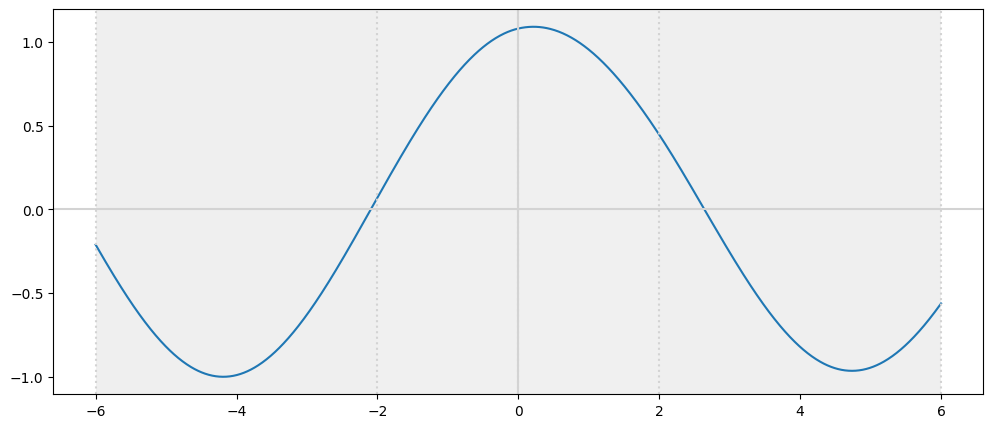

In [10]:
A.plot_field_1d(Fr1, plot_axis=True, part='real', plot_regions=True, plot_Rhos=True, hatch=None)

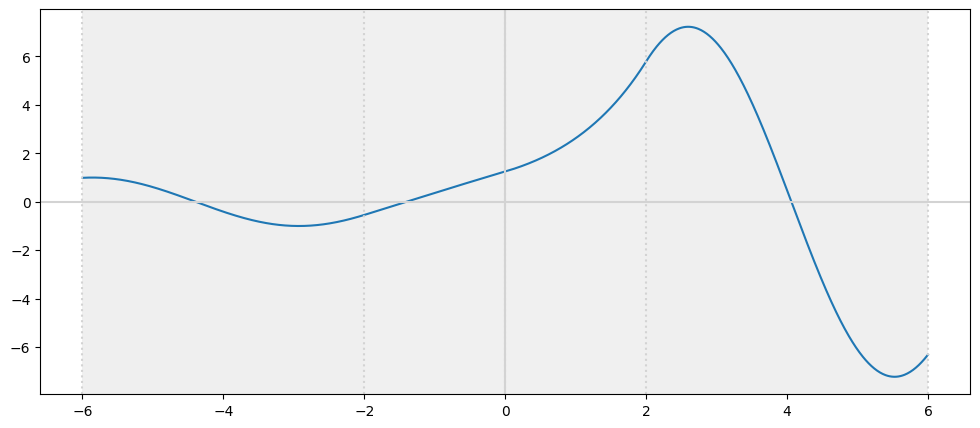

In [50]:
A.plot_field_1d(Fr2, plot_axis=True, part='real', plot_regions=True, plot_Rhos=True, hatch=None)